# Crimes

In [4]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# dates and locations and weather
from meteostat import Point, Daily
from datetime import datetime

In [5]:
# download crimes data from https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
# and save it as crimes.csv
df = pd.read_csv('https://web.stanford.edu/~udell/data/crimes.csv', nrows=5000000)
# if you have a smaller cut of the data saved locally already,
# df = pd.read_csv('data/crimes.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,6.0,44.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [6]:
# how many crimes in each year?
df.groupby('Year').size()

Year
2016    261960
2017    261451
2018    261103
dtype: int64

In [7]:
# convert date to datetime
df['timestamp'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,timestamp
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01 00:25:00
2,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-01-01 08:00:00
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20 16:00:00
4,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,44.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-04-01 00:01:00


In [8]:
# Introduce a column for month and for day
df['Month'] = df['timestamp'].apply(lambda t: t.month)
df['Day'] = df['timestamp'].apply(lambda t: t.day)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,timestamp,Month,Day
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00,9,1
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01 00:25:00,5,1
2,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-01-01 08:00:00,1,1
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20 16:00:00,12,20
4,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-04-01 00:01:00,4,1


In [9]:
crimes = df.groupby(['Month','Day','Year']).size()
crimes.head()

Month  Day  Year
1      1    2016    1051
            2017    1089
            2018     826
       2    2016     565
            2017     596
dtype: int64

In [11]:
# group by date and count crimes on each date
crimes = df.groupby(['Month','Day','Year']).size().reset_index(name='count')
crimes.head(20)

,Month,Day,Year,count
0,1,1,2016,1051
1,1,1,2017,1089
2,1,1,2018,826
3,1,2,2016,565
4,1,2,2017,596
5,1,2,2018,545
6,1,3,2016,606
7,1,3,2017,690
8,1,3,2018,557
9,1,4,2016,616


Poll: why do you suppose there are way more crimes on January 1?

In [12]:
# reintroduce a date column
crimes['date'] = crimes.apply(lambda row: datetime(row['Year'], row['Month'], row['Day']), axis=1)
crimes.head()

,Month,Day,Year,count,date
0,1,1,2016,1051,2016-01-01
1,1,1,2017,1089,2017-01-01
2,1,1,2018,826,2018-01-01
3,1,2,2016,565,2016-01-02
4,1,2,2017,596,2017-01-02


(array([16801., 16922., 17045., 17167., 17287., 17410., 17532., 17652.,
        17775., 17897.]),
 [Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01')])

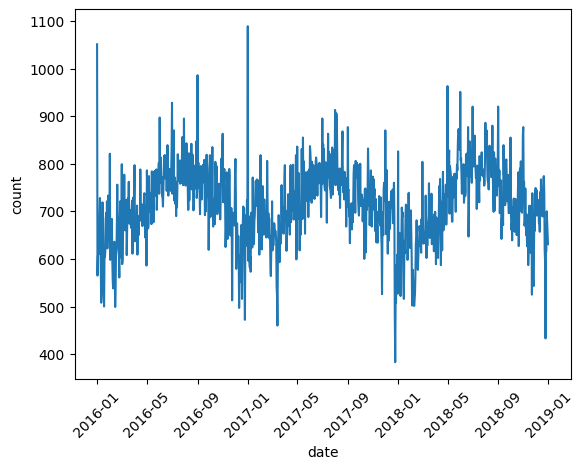

In [13]:
sns.lineplot(x='date', y='count', data=crimes)
# rotate x axis labels
plt.xticks(rotation=45)

# temperature in Chicago

In [14]:
# latitude and longitude of Chicago
lat = 41.8781
lon = -87.6298

In [15]:
# Set time period
start = datetime(2016, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Chicago
chicago = Point(lat, lon, 70)

# Get daily data
weather = Daily(chicago, start, end)
weather = weather.fetch()
weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN
2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN
2016-01-03,-1.4,-3.7,0.1,0.0,51.0,314.0,18.8,NaN,1021.6,NaN
2016-01-04,-1.1,-3.2,0.7,0.0,51.0,4.0,18.1,NaN,1031.7,NaN
2016-01-05,-1.7,-5.4,1.8,0.0,25.0,177.0,15.3,NaN,1033.4,NaN


In [16]:
# annotate the data with the average temperature on each day 
# join the two dataframes on the date column in the first dataframe and the time column in the second dataframe
crimes = crimes.merge(weather, left_on='date', right_on='time')
crimes.sort_values('tmax')
crimes.head()

,Month,Day,Year,count,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1,1,2016,1051,2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN
1,1,1,2017,1089,2017-01-01,0.1,-4.9,5.7,0.0,0.0,NaN,8.9,NaN,1020.6,NaN
2,1,1,2018,826,2018-01-01,-18.4,-21.0,-15.4,0.0,51.0,281.0,16.9,NaN,1041.9,NaN
3,1,2,2016,565,2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN
4,1,2,2017,596,2017-01-02,3.6,0.1,5.7,6.1,0.0,81.0,11.2,NaN,1017.9,NaN


<Axes: xlabel='tmax', ylabel='count'>

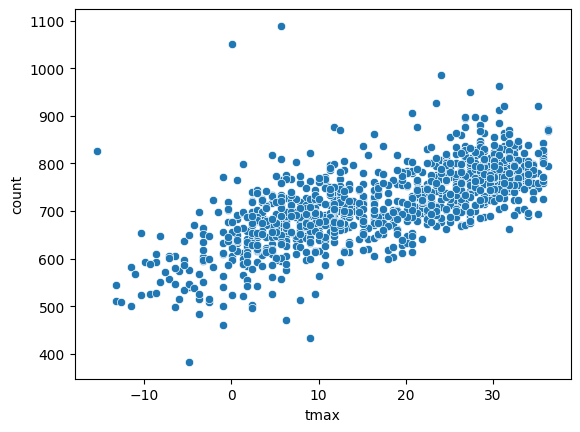

In [17]:
# plot crime as a function of temperature
sns.scatterplot(x='tmax', y='count', data=crimes)

poll: guess the correlation b/w temperature and crime



# choose a subsample of data on which to fit our model

In [20]:
# make three datasets, with crimes in 2016, 2017, and 2018
crimes_2016 = crimes[crimes['Year'] == 2016]
crimes_2017 = crimes[crimes['Year'] == 2017]
crimes_2018 = crimes[crimes['Year'] == 2018]

In [21]:
# use data from 2016 to train
crimes = crimes_2016

# fit the relationship between temperature and crime

<Axes: xlabel='tmax', ylabel='count'>

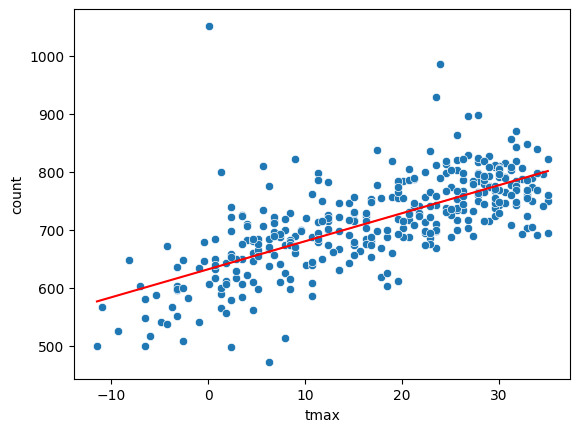

In [23]:
model1 = smf.ols(formula='count ~ 1 + tmax', data=crimes).fit()
sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(x=crimes['tmax'], y=model1.predict(crimes), color='red')

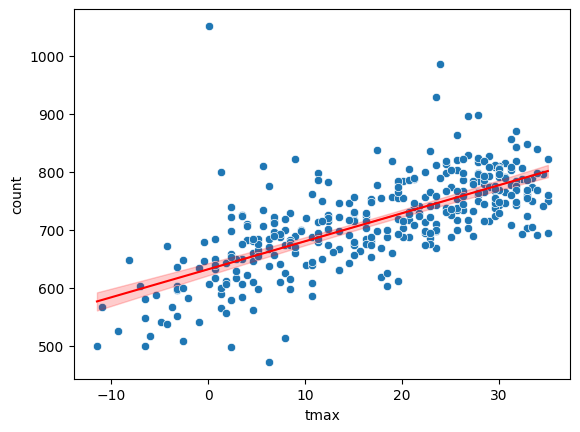

In [25]:
# plot the confidence interval
CI = model1.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(crimes, left_index=True, right_index=True).sort_values('tmax')
sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(x=crimes['tmax'], y=model1.predict(crimes), color='red')
plt.fill_between(CI['tmax'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

poll: interpret the confidence interval

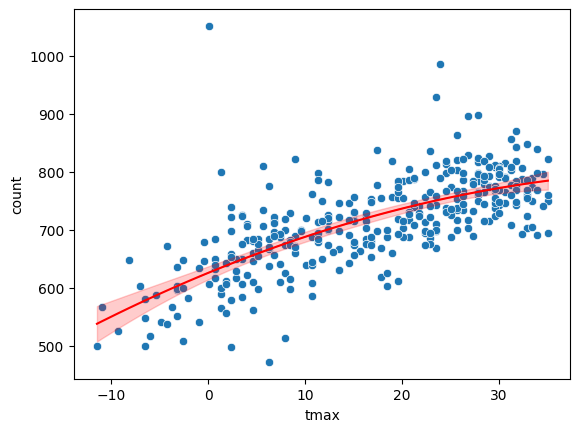

In [27]:
# let's try a model with a quadratic term
model2 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2)', data=crimes).fit()
sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(x=crimes['tmax'], y=model2.predict(crimes), color='red')

# plot the confidence interval
CI = model2.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(crimes, left_index=True, right_index=True).sort_values('tmax')
plt.fill_between(CI['tmax'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

In [ ]:
# ...why not keep going?
model3 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + I(tmax**3)', data=crimes).fit()
model4 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + I(tmax**3) + I(tmax**4)', data=crimes).fit()
model5 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + I(tmax**3) + I(tmax**4) + I(tmax**5)', data=crimes).fit()

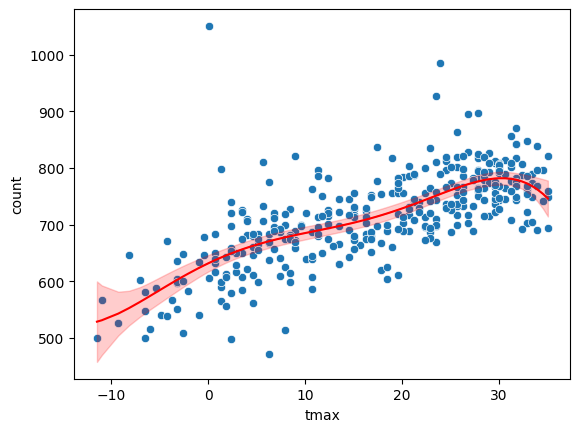

In [30]:
model = model5

sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(x=crimes['tmax'], y=model.predict(crimes), color='red')

# plot the confidence interval
CI = model.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(crimes, left_index=True, right_index=True).sort_values('tmax')
plt.fill_between(CI['tmax'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

# Model evaluation

many metrics to tell if a model is good!
* mse, rmse
* r squared, adjusted r squared
* AIC, BIC
* ...

# rmse

* mean square error -> this is what OLS minimizes!
* root mean square error (rmse)

In [31]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print('RMSE: ', rmse(crimes['count'], model.predict(crimes)))

RMSE:  55.487933137038254


In [32]:
models = dict(zip(["order"+str(i) for i in range(1,6)], [model1, model2, model3, model4, model5]))
for name, model in models.items():
    print(name, "RMSE: ", rmse(crimes['count'], model.predict(crimes)))

order1 RMSE:  56.863122446680215
order2 RMSE:  56.224121956155905
order3 RMSE:  56.22212772583282
order4 RMSE:  55.75513364998659
order5 RMSE:  55.487933137038254


poll: why does RMSE decrease as the model order increases?

In [34]:
# statsmodels has a function to compute this, normalizing by the *residual* degrees of freedom (n - p - 1) instead of by n
# so it's close to the RMSE, but not quite the same
np.sqrt(model.mse_resid)

55.94842180572003

In [36]:
for name, model in models.items():
    print(name, "sqrt MSE resid: ", np.sqrt(model.mse_resid))

order1 sqrt MSE resid:  57.019125819241275
order2 sqrt MSE resid:  56.455974989100625
order3 sqrt MSE resid:  56.53189385934233
order4 sqrt MSE resid:  56.13992174702215
order5 sqrt MSE resid:  55.94842180572003


# R squared

* the fraction of the variance in the output that can be attributed to a linear relationship with the input features

<Axes: xlabel='count'>

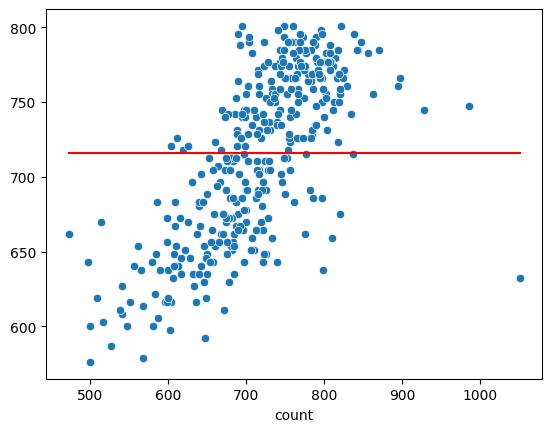

In [37]:
model = smf.ols(formula='count ~ tmax', data=crimes).fit()

y = crimes['count']
yhat = model.predict(crimes)
ybar = np.mean(y)*np.ones(len(y))

sns.scatterplot(x=y, y=yhat)
sns.lineplot(x=y, y=ybar, color='red')

In [39]:
SSR = np.sum((y-yhat)**2) # residual sum of squares
SST = np.sum((y-ybar)**2) # total sum of squares
R2 = 1 - SSR/SST
print("{:.2f}% of the variance can be attributed to a linear relationship between crime and temperature".format(R2*100))

49.69% of the variance can be attributed to a linear relationship between crime and temperature


In [40]:
# compare to the R2 computed by statsmodels 
model.rsquared

0.49685152440403146

In [41]:
# R2 is also equal to the square of the correlation between y and yhat
np.corrcoef(y, yhat)[0,1]**2

0.4968515244040309

# Many other statistics computed by default in statsmodels!

 * F statistic: tests the hypothesis that $\beta_1=\beta_2=\ldots=\beta_p=0$
    * i.e., that output is NOT related to ANY of the inputs
    * often it is obvious that this hypothesis is false
    * used occasionally for more sophisticated procedures built on top of linear regression.

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     359.4
Date:                Sun, 14 May 2023   Prob (F-statistic):           3.02e-56
Time:                        19:14:20   Log-Likelihood:                -1998.2
No. Observations:                 366   AIC:                             4000.
Df Residuals:                     364   BIC:                             4008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    631.6894      5.342    118.252      0.000     621.184     642.194
tmax           4.8214      0.254     18.959      0.000       4.321       5.321
==============================================================================
Omnibus:                      136.493   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.414
Skew:                           1.307   Prob(JB):                    2.92e-262
Kurtosis:                      11.494   Cond. No.                         37.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# statsmodels has a function to compare models
sm.stats.anova_lm(model1, model2, model3, model4, model5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,364.0,1.183430e+06,0.0,NaN,NaN,NaN
1,363.0,1.156982e+06,1.0,26448.186500,8.449290,0.003876
2,362.0,1.156900e+06,1.0,82.073202,0.026220,0.871456
3,361.0,1.137760e+06,1.0,19139.134675,6.114298,0.013869
4,360.0,1.126881e+06,1.0,10879.058850,3.475487,0.063098


# Poll: should we keep going?

residual sum of squares keeps going down! how can we tell when to stop adding features?

* A) the more features, the better!
* B) stop when the r squared starts to decrease
* C) stop after adding sqrt(n) features
* D) stop when the rmse starts to decrease
* E) stop when the model starts to get worse on data it wasn't trained on

# What about performance on new data?

We will *train* the model on data from 2016 and *evaluate* the model on data from all years.

55.487933137038254

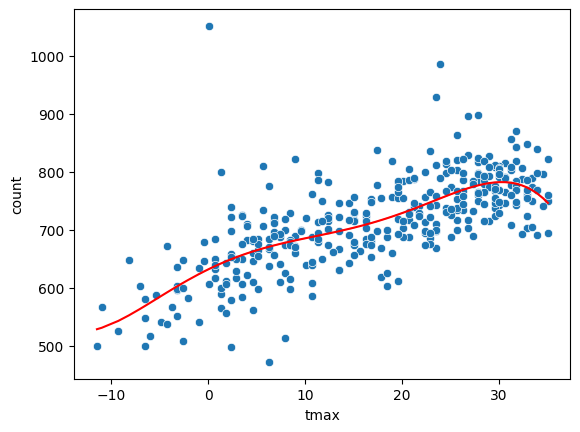

In [47]:
# plot performance on data from 2016
model = model5
sns.scatterplot(x='tmax', y='count', data=crimes_2016)
sns.lineplot(x=crimes_2016['tmax'], y=model.predict(crimes_2016), color='red')
rmse(model.predict(crimes_2016), crimes_2016['count'])

In [48]:
# generate models for all polynomial degrees up to 9
max_degree = 9
models = [smf.ols(formula='count ~ 1 + tmax + I(tmax**{})'.format(i), data=crimes).fit() for i in range(2, max_degree+1)]
models.insert(0, smf.ols(formula='count ~ 1 + tmax', data=crimes).fit())

models = dict(zip(["order"+str(i) for i in range(1,max_degree+1)], models))

In [49]:
# let's look at how the models perform on data from other years
years = [2016, 2017, 2018]
data = [crimes_2016, crimes_2017, crimes_2018]
rmses = {}
for iyear in range(len(years)):
    year = years[iyear]
    icrimes = data[iyear]
    rmses[year] = [rmse(model.predict(icrimes), icrimes['count']) for model in models.values()]
rmses['name'] = models.keys()
rmses = pd.DataFrame(rmses)
rmses.set_index('name', inplace=True)
rmses

,2016,2017,2018
name,,,
order1,56.863122,59.294431,56.356590
order2,56.224122,58.949233,57.680577
order3,56.256826,59.321086,57.431126
order4,56.204260,59.466972,57.687035
order5,56.157468,59.571372,57.806359
order6,56.110769,59.628705,58.002017
order7,56.073609,59.663224,58.174253
order8,56.045402,59.679599,58.363602
order9,56.026346,59.686508,58.573917


poll: what model order would you pick?

Text(0, 0.5, 'RMSE')

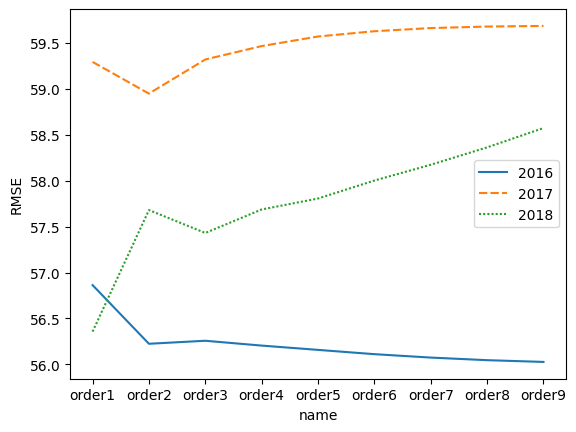

In [52]:
sns.lineplot(data=rmses)
plt.ylabel('RMSE')

look at performance when we train on subsample of data vs on all data from 2016

we see that the high order polynomial models overfit!
* performance on 2016 (the year we trained on) improves with higher model orders
* performance on 2017 and 2018 data is decent for linear or quadratic models, but worsens with additional higher order terms

# Binary predictors

maybe snow also affects crime rates? let's consider whether adding an indicator for snow improves our prediction.

In [53]:
crimes['snow_indicator'] = crimes['snow'] > 0
crimes.head()

,Month,Day,Year,count,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,snow_indicator
0,1,1,2016,1051,2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN,True
3,1,2,2016,565,2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN,True
6,1,3,2016,606,2016-01-03,-1.4,-3.7,0.1,0.0,51.0,314.0,18.8,NaN,1021.6,NaN,True
9,1,4,2016,616,2016-01-04,-1.1,-3.2,0.7,0.0,51.0,4.0,18.1,NaN,1031.7,NaN,True
12,1,5,2016,612,2016-01-05,-1.7,-5.4,1.8,0.0,25.0,177.0,15.3,NaN,1033.4,NaN,True


<Axes: xlabel='tmax', ylabel='count'>

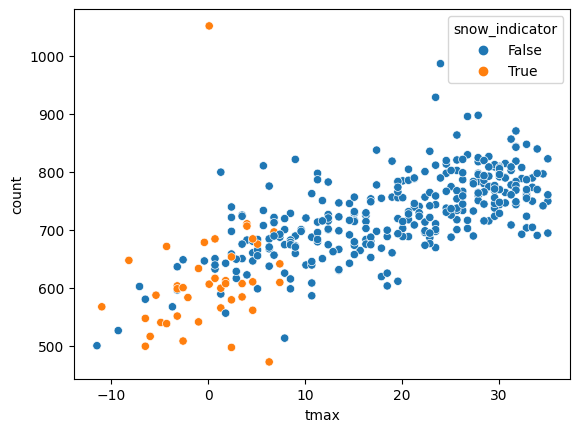

In [54]:
# plot the data as a function of temperature, with different colors for snow and no snow
sns.scatterplot(x='tmax', y='count', hue='snow_indicator', data=crimes)

In [55]:
# fit an ols model using temperature and an indicator for snow
model = smf.ols(formula='count ~ 1 + tmax + snow_indicator', data=crimes).fit()
models['temp+snow'] = model
rmse(model.predict(crimes), crimes['count'])

56.14297859217241

In [56]:
model.params

Intercept                 644.023966
snow_indicator[T.True]    -33.494626
tmax                        4.334279
dtype: float64

# poll: does snow increase or decrease crime rate?

* A) increase
* B) decrease

<Axes: xlabel='tmax', ylabel='count'>

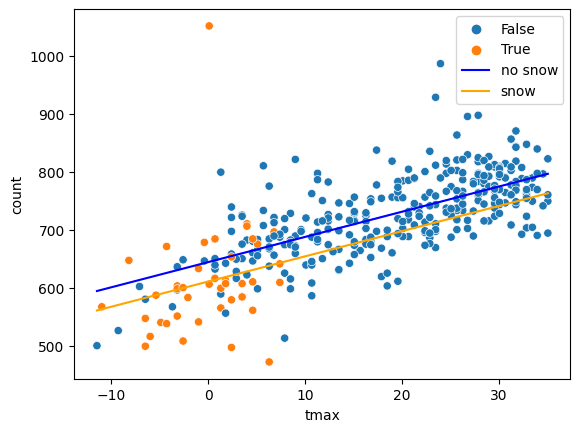

In [58]:
# plot the data as a function of temperature, with different colors for snow and no snow
sns.scatterplot(x='tmax', y='count', hue='snow_indicator', data=crimes)

# plot line for no snow
sns.lineplot(x=crimes['tmax'], y=model.params[0] + model.params[2]*crimes['tmax'], color='blue', label='no snow')

# plot line for snow
sns.lineplot(x=crimes['tmax'], y=model.params[0] + model.params[1] + model.params[2]*crimes['tmax'], color='orange', label='snow')

<AxesSubplot:xlabel='tmax', ylabel='count'>

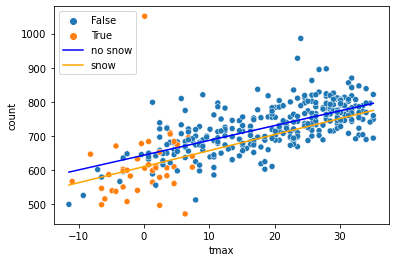

In [ ]:
# compare to separate models for snow and no snow, which fits different slopes for each
model_snow = smf.ols(formula='count ~ 1 + tmax', data=crimes[crimes['snow_indicator']]).fit()
model_nosnow = smf.ols(formula='count ~ 1 + tmax', data=crimes[~crimes['snow_indicator']]).fit()

# plot data 
sns.scatterplot(x='tmax', y='count', hue='snow_indicator', data=crimes)

# plot line for no snow
sns.lineplot(crimes['tmax'], model_nosnow.params[0] + model_nosnow.params[1]*crimes['tmax'], color='blue', label='no snow')

# plot line for snow
sns.lineplot(crimes['tmax'], model_snow.params[0] + model_snow.params[1]*crimes['tmax'], color='orange', label='snow')

<AxesSubplot:xlabel='tmax', ylabel='count'>

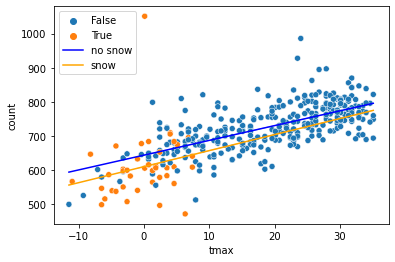

In [ ]:
# equivalently, we can fit a model with an interaction term, which allows different slopes for each group
model = smf.ols(formula='count ~ 1 + tmax + snow_indicator + tmax*snow_indicator', data=crimes).fit()
models['temp+snow+interaction'] = model
rmse(model.predict(crimes), crimes['count'])

# plot the data as a function of temperature, with different colors for snow and no snow
sns.scatterplot(x='tmax', y='count', hue='snow_indicator', data=crimes)

# plot line for no snow
sns.lineplot(crimes['tmax'], model.params[0] + model.params[2]*crimes['tmax'], color='blue', label='no snow')

# plot line for snow
sns.lineplot(crimes['tmax'], model.params[0] + model.params[1] + model.params[2]*crimes['tmax'] + model.params[3]*crimes['tmax'], color='orange', label='snow')


# Categorical predictors

In [ ]:
crimes.head()

,Month,Day,Year,count,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,dayofweek,snow_indicator
0,1,1,2016,1051,2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN,4,True
3,1,2,2016,565,2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN,5,True
6,1,3,2016,606,2016-01-03,-1.4,-3.7,0.1,0.0,51.0,314.0,18.8,NaN,1021.6,NaN,6,True
9,1,4,2016,616,2016-01-04,-1.1,-3.2,0.7,0.0,51.0,4.0,18.1,NaN,1031.7,NaN,0,True
12,1,5,2016,612,2016-01-05,-1.7,-5.4,1.8,0.0,25.0,177.0,15.3,NaN,1033.4,NaN,1,True


In [ ]:
# let's add a column indicating the day of the week as a categorical variable
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes['dayofweek'] = list(map(lambda i: day_names[i], crimes['date'].dt.dayofweek))
crimes.head()

,Month,Day,Year,count,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,dayofweek,snow_indicator
0,1,1,2016,1051,2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN,Friday,True
3,1,2,2016,565,2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN,Saturday,True
6,1,3,2016,606,2016-01-03,-1.4,-3.7,0.1,0.0,51.0,314.0,18.8,NaN,1021.6,NaN,Sunday,True
9,1,4,2016,616,2016-01-04,-1.1,-3.2,0.7,0.0,51.0,4.0,18.1,NaN,1031.7,NaN,Monday,True
12,1,5,2016,612,2016-01-05,-1.7,-5.4,1.8,0.0,25.0,177.0,15.3,NaN,1033.4,NaN,Tuesday,True


In [ ]:
# let's form an ols model with the day of the week as a categorical variable
model = smf.ols(formula='count ~ 1 + tmax + C(dayofweek)', data=crimes).fit()
models['temp+day'] = model

# compute the rmse on the training data
rmse(model.predict(crimes), crimes['count'])

52.63229635407873

In [ ]:
model.params

Intercept                    675.474400
C(dayofweek)[T.Monday]       -50.617171
C(dayofweek)[T.Saturday]     -34.052959
C(dayofweek)[T.Sunday]       -70.190050
C(dayofweek)[T.Thursday]     -41.592696
C(dayofweek)[T.Tuesday]      -56.931516
C(dayofweek)[T.Wednesday]    -61.059783
tmax                           4.877752
dtype: float64

# Poll

what happened to Friday?

what day has the highest crime rate?

what day has the lowest crime rate?

In [ ]:
# we can view the data matrix for the model to understand how the model handles categorical variables
model.model.data.orig_exog

,Intercept,C(dayofweek)[T.Monday],C(dayofweek)[T.Saturday],C(dayofweek)[T.Sunday],C(dayofweek)[T.Thursday],C(dayofweek)[T.Tuesday],C(dayofweek)[T.Wednesday],tmax
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.3
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7
12,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.8
...,...,...,...,...,...,...,...,...
1081,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.7
1084,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.4
1087,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.9
1090,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5


In [ ]:
# snow, temperature, and day of the week as a categorical variable?
model = smf.ols(formula='count ~ 1 + tmax + snow_indicator + C(dayofweek)', data=crimes).fit()
models['temp+snow+day'] = model

# compute the rmse on the training data
rmse(model.predict(crimes), crimes['count'])

52.10549375031998

In [ ]:
# snow, temperature, temperature squared, and day of the week as a categorical variable?
model = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + snow_indicator + C(dayofweek)', data=crimes).fit()
models['temp+temp^2+snow+day'] = model

# compute the rmse on the training data
rmse(model.predict(crimes), crimes['count'])

51.876541541026675

In [ ]:
# ...and interactions between snow and day of the week?
# * includes all interactions between the variables (and the variables themselves)
model = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + snow_indicator * C(dayofweek)', data=crimes).fit()
models['temp+temp^2+snow*day'] = model

# compute the rmse on the training data
rmse(model.predict(crimes), crimes['count'])

50.21280280286143

# let's look at how the models perform on data from other years

In [ ]:
# add day of week and snow indicator to every years' data
years = [2016, 2017, 2018]
data = [crimes_2016, crimes_2017, crimes_2018]
for iyear in range(len(years)):
    year = years[iyear]
    icrimes = data[iyear]
    icrimes['dayofweek'] = icrimes['date'].dt.dayofweek
    icrimes['snow_indicator'] = icrimes['snow'] > 0
    data[iyear] = icrimes

In [ ]:
rmses = {}
for iyear in range(len(years)):
    year = years[iyear]
    icrimes = data[iyear]
    rmses[year] = [rmse(model.predict(icrimes), icrimes['count']) for model in models.values()]
rmses['name'] = models.keys()
rmses = pd.DataFrame(rmses)
rmses.set_index('name', inplace=True)
rmses

,2016,2017,2018
name,,,
order1,56.863122,59.294431,56.356590
order2,56.224122,58.949233,57.680577
order3,56.256826,59.321086,57.431126
order4,56.204260,59.466972,57.687035
order5,56.157468,59.571372,57.806359
order6,56.110769,59.628705,58.002017
order7,56.073609,59.663224,58.174253
order8,56.045402,59.679608,58.363834
order9,56.026310,59.684030,58.540243


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

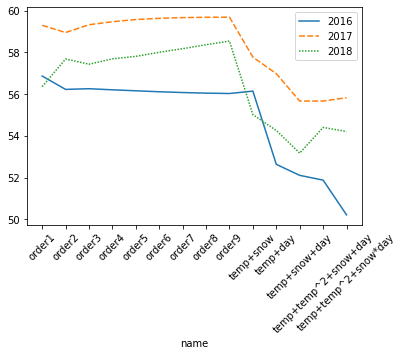

In [ ]:
sns.lineplot(data=rmses)
# rotate the xtick labels
plt.xticks(rotation=45)

* while adding more polynomial features overfits, the extra binary and categorical features help the model generalize better

# Create a random train test split

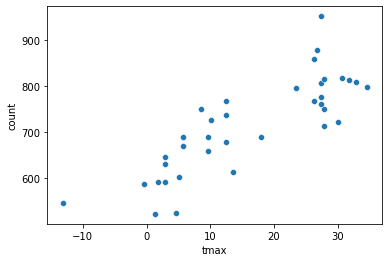

In [ ]:
# subsample from the data to split a training and test set
crimes_train = crimes_2018.sample(frac=0.1, random_state=10)
crimes_test = crimes_2018.drop(crimes_train.index)
sns.scatterplot(x='tmax', y='count', data=crimes_train)
train = crimes_train

In [ ]:
# could go back up to train just on this random sample
crimes = crimes_train